In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.mplot3d import Axes3D
# import plotly.graph_objects as go

<ipython-input-5-a716d021effb>:111: UserWarning: Matplotlib is currently using module://ipympl.backend_nbagg, which is a non-GUI backend, so cannot show the figure.
  fig0.show()
<ipython-input-5-a716d021effb>:120: UserWarning: Matplotlib is currently using module://ipympl.backend_nbagg, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-5-a716d021effb>:159: UserWarning: Matplotlib is currently using module://ipympl.backend_nbagg, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


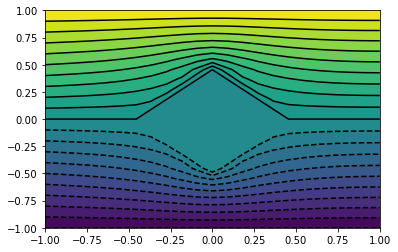

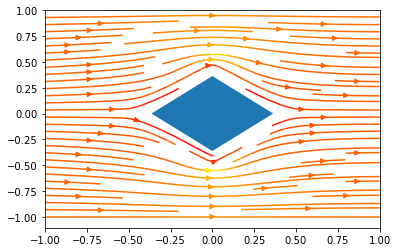

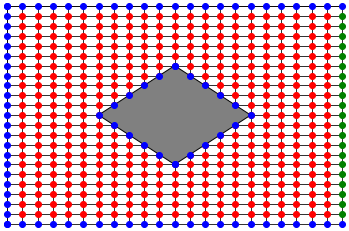

In [5]:
# Discritize The Space Into N number of Points
N = 23
# setting up xmin and xmax and ymin and ymax
y0 = x0 = -1
y1 = x1 = 1
# defining Size of Diamond as number of spaces from the centre
DiamondSize = 5
s = 0.8
# Distance Between Points 
steps = y1/((N-1)/2)

Y, X =  np.ogrid[y0:y1+steps:steps, x0:x1+steps:steps]

# Creating Our System of Equations
A = np.zeros((N**2, N**2))
B = np.zeros(N**2)
count = 0
for y in range(N):
    for x in range(N):
        C = np.zeros((N, N))
        if y == 0:
            C[y][x] = 1
            B[count] = y0/(y1-y0)
        elif y == N-1:
            C[y][x] = 1
            B[count] = y1/(y1-y0)
        elif x == 0 and y > 0 and y < N-1:
            C[y][x] = 1
            B[count] = Y[y]/(y1-y0)
        elif x == N-1 and y > 0 and y < N-1:
            C[y][x] = 4
            C[y][x-1] = -2
            C[y+1][x] = -1
            C[y-1][x] = -1
            B[count] = 0
        elif x > 0 and y > 0 and x < N-1 and y < N-1:
            C[y][x] = 4
            C[y-1][x] = -1
            C[y+1][x] = -1
            C[y][x-1] = -1
            C[y][x+1] = -1
            B[count] = 0
        A[count] = C.ravel()
        count = count + 1

# Slotting In Diamond
z = np.zeros(N**2)
di = int(((N**2)-1)/2)

for i in range(-(DiamondSize), DiamondSize+1):
    A[di+i] = z
    A[di+i][di+i] = 1
    A[di+N*i] = z
    A[di+N*i][di+N*i] = 1

# Solving the System
ans = np.linalg.solve(A, B)
phi = ans.reshape((N, N))

# Making sure that points where Diamond exists is = 0
n = int((N-1)/2)

for i in range(DiamondSize+1):
    phi[n+i, n-DiamondSize+i:n+DiamondSize+1-i] = 0
    phi[n-i, n-DiamondSize+i:n+DiamondSize+1-i] = 0
# Calculating the X and Y velocity components for Streamline Plot
u = np.zeros((N, N))
v = np.zeros((N, N))

for y in range(N):
    for x in range(N):
        if y == 0:
            u[y][x] = (phi[y+1][x]-phi[y][x])/(steps)
            if x == 0:
                v[y][x] = (phi[y][x+1]-phi[y][x])/(steps)
            elif x > 0 and x < N-1:
                v[y][x] = (phi[y][x+1]-phi[y][x-1])/(2*steps)
            elif x == N-1:
                v[y][x] = (phi[y][x]-phi[y][x-1])/(steps)
        elif y == N-1:
            u[y][x] = (phi[y][x]-phi[y-1][x])/(steps)
            if x == 0:
                v[y][x] = (phi[y][x+1]-phi[y][x])/(steps)
            elif x > 0 and x < N-1:
                v[y][x] = (phi[y][x+1]-phi[y][x-1])/(2*steps)
            elif x == N-1:
                v[y][x] = (phi[y][x]-phi[y][x-1])/(steps)
        elif x == 0 and y > 0 and y < N-1:
            u[y][x] = (phi[y+1][x]-phi[y-1][x])/(2*steps)
            v[y][x] = (phi[y][x+1]-phi[y][x])/(steps)
        elif x == N-1 and y > 0 and y < N-1:
            u[y][x] = (phi[y+1][x]-phi[y-1][x])/(2*steps)
            v[y][x] = (phi[y][x]-phi[y][x-1])/(steps)
        elif x > 0 and y > 0 and x < N-1 and y < N-1:
            u[y][x] = (phi[y+1][x]-phi[y-1][x])/(2*steps)
            v[y][x] = (phi[y][x+1]-phi[y][x-1])/(2*steps)
            
# Again making sure that points where Diamond Exists is = 0
for i in range(DiamondSize+1):
    u[n+i, n-DiamondSize+i:n+DiamondSize+1-i] = 0
    v[n+i, n-DiamondSize+i:n+DiamondSize+1-i] = 0
    u[n-i, n-DiamondSize+i:n+DiamondSize+1-i] = 0
    v[n-i, n-DiamondSize+i:n+DiamondSize+1-i] = 0

# Plotting the Results
# %matplotlib widget
X, Y = np.meshgrid(X, Y)
fig0, ax0 = plt.subplots(1)
cs = ax0.contourf(X, Y, phi, N)
ax0.contour(cs, colors='k')
fig0.show()

w = np.sqrt(((2*DiamondSize*(steps))**2)/2)
yc = np.sqrt((w**2)/2)

fig1, ax1 = plt.subplots(1)
ax1.streamplot(X, Y, u, -v, color=u, density=1, cmap='autumn')
dimo = plt.Rectangle((0, -s*yc), width=s*w, height=s*w, angle=45, zorder=10)
ax1.add_patch(dimo)
fig1.show()

# fig2 = go.Figure(data=[go.Surface(z=phi)])
# fig2.update_traces(contours_z=dict(show=True, usecolormap=True,
#                                   highlightcolor="limegreen", project_z=True))
# fig2.show()

fig3, ax3 = plt.subplots(1)
loc = MultipleLocator(steps)
ax3.xaxis.set_major_locator(loc)
ax3.yaxis.set_major_locator(loc)
ax3.grid(b=True, which="both", axis="both", color="k")
ax3.scatter(X[1:-1, 1:-1], Y[1:-1, 1:-1], zorder=10, clip_on=False, color='r')
ax3.scatter(X[0, :], Y[0, :], zorder=10, clip_on=False, color='b')
ax3.scatter(X[-1, :], Y[-1, :], zorder=10, clip_on=False, color='b')
ax3.scatter(X[:, 0], Y[:, 0], zorder=10, clip_on=False, color='b')
ax3.scatter(X[1:-1, -1], Y[1:-1, -1], zorder=10, clip_on=False, color='g')
xvals = []
yvals = []
for i in range(DiamondSize+1):
    for j in range(n-DiamondSize+i, n+DiamondSize-i+1):
        if j == n-DiamondSize+i or j == n+DiamondSize-i:
            xvals.append(x1-steps*(n+i))
            yvals.append(y1-steps*(j))
            xvals.append(x1-steps*(n-i))
            yvals.append(y1-steps*(j))
xvals = np.array(xvals)
yvals = np.array(yvals)
ax3.scatter(xvals, yvals, zorder=11, clip_on=False, color='b')
dimnd = plt.Rectangle((0, 0-steps*(DiamondSize)), width=w, height=w, angle=45, zorder=10, color='0.5')
dimnd.set_edgecolor('k')
ax3.add_patch(dimnd)

ax3.set_xlim(x0, x1)
ax3.set_ylim(y0, y1)
ax3.xaxis.set_ticklabels([])
ax3.xaxis.set_ticks_position('none')
ax3.yaxis.set_ticklabels([])
ax3.yaxis.set_ticks_position('none')
fig3.show()